In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os

#데이터 분석

In [ ]:
# 데이터 크기 확인
DATA_PATH = '/content/sample_data/'

DATA_IN_PATH = '/content/sample_data/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
train.csv                     0.65MB
test.csv                      0.32MB
sampleSubmission.csv          0.14MB
mnist_test.csv                18.29MB
california_housing_train.csv  1.71MB
california_housing_test.csv   0.3MB
mnist_train_small.csv         36.52MB


In [ ]:
# 데이터 불러오기
train = pd.read_csv(DATA_PATH + 'train.csv', parse_dates=["datetime"])
test = pd.read_csv(DATA_PATH + 'test.csv')
ALL_DATA = [train, test]

In [ ]:
# 데이터의 간단한 정보 확인
def data_info(data):
    print('----------데이터 정보-----------')
    print(data.info())
    print('----------결측치 확인-----------')
    print(data.isnull().sum())
for D in ALL_DATA:
    data_info(D)

----------데이터 정보-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
----------결측치 확인-----------
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0

# 각 데이터 분석

### train

In [ ]:
train.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


### test

In [ ]:
test.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6483,2012-12-31 14:00:00,1,0,1,2,11.48,13.635,45,15.0013
6484,2012-12-31 15:00:00,1,0,1,2,11.48,14.395,45,8.9981
6485,2012-12-31 16:00:00,1,0,1,2,10.66,12.880,48,12.9980
6486,2012-12-31 17:00:00,1,0,1,2,10.66,14.395,48,6.0032
6487,2012-12-31 18:00:00,1,0,1,2,10.66,13.635,48,8.9981
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


### 연도, 월, 일, 시간 별 대여량

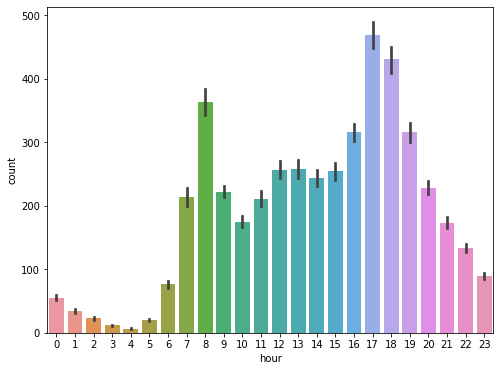

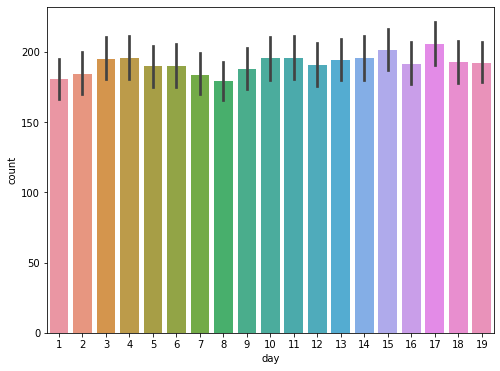

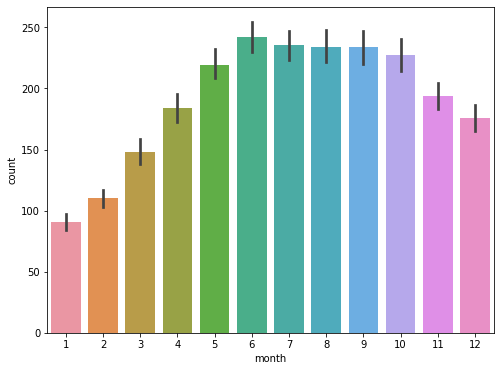

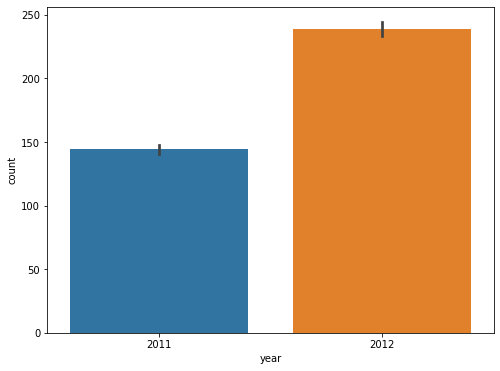

In [ ]:
#시간(년,월,일,시) 별 대여량

data = train.copy()
# 연,월, 일, 시간 데이터 분리

data['year'] = pd.DatetimeIndex(train['datetime']).year
data['month'] = pd.DatetimeIndex(train['datetime']).month
data['day'] = pd.DatetimeIndex(train['datetime']).day
data['hour'] = pd.DatetimeIndex(train['datetime']).hour

# 시간 별 비교
# 아침 (대략 8시), 저녁 (대략 17시)
# 출퇴근 시간에 자전거 대여량이 크게 증가하였음
plt.figure(figsize =[8,6])
sns.barplot(x = 'hour', y = 'count', data = data)

# 일별
# 날짜는 자전거 대여량에 크게 관여하지 않는 것으로 확인
plt.figure(figsize =[8,6])
sns.barplot(x = 'day', y = 'count', data = data)

# 월별
# [12월, 1월, 2월], [3월, 4월, 5월], [6월, 7월, 8월] 중 
# [6월, 7월, 8월], [3월, 4월, 5월], [12월, 1월, 2월] 순으로 자전거 대여량이 높음 
plt.figure(figsize =[8,6])
sns.barplot(x = 'month', y = 'count', data = data)

# 년도별
# 2011년도보다 2012년도에 자전거 대여량이 눈에 띄게 증가하였음 
plt.figure(figsize =[8,6])
sns.barplot(x = 'year', y = 'count', data = data)

### 계절 별 대여량

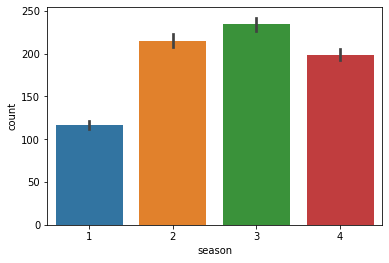

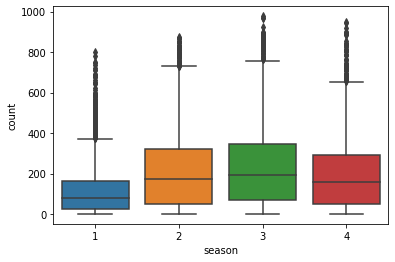

In [ ]:
# 계절 별 대여량
# 1 : spring 
# 2 : summer 
# 3 : fall 
# 4 : winter
# 가을 > 여름 > 겨울 > 봄 의 순서로 자전거 대여량이 많음
plt.figure(figsize=(6, 4))
sns.barplot(data=train, x = 'season', y= 'count')
plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x = 'season', y= 'count')

### 근무일 별 대여량

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Holidays'),
 None]

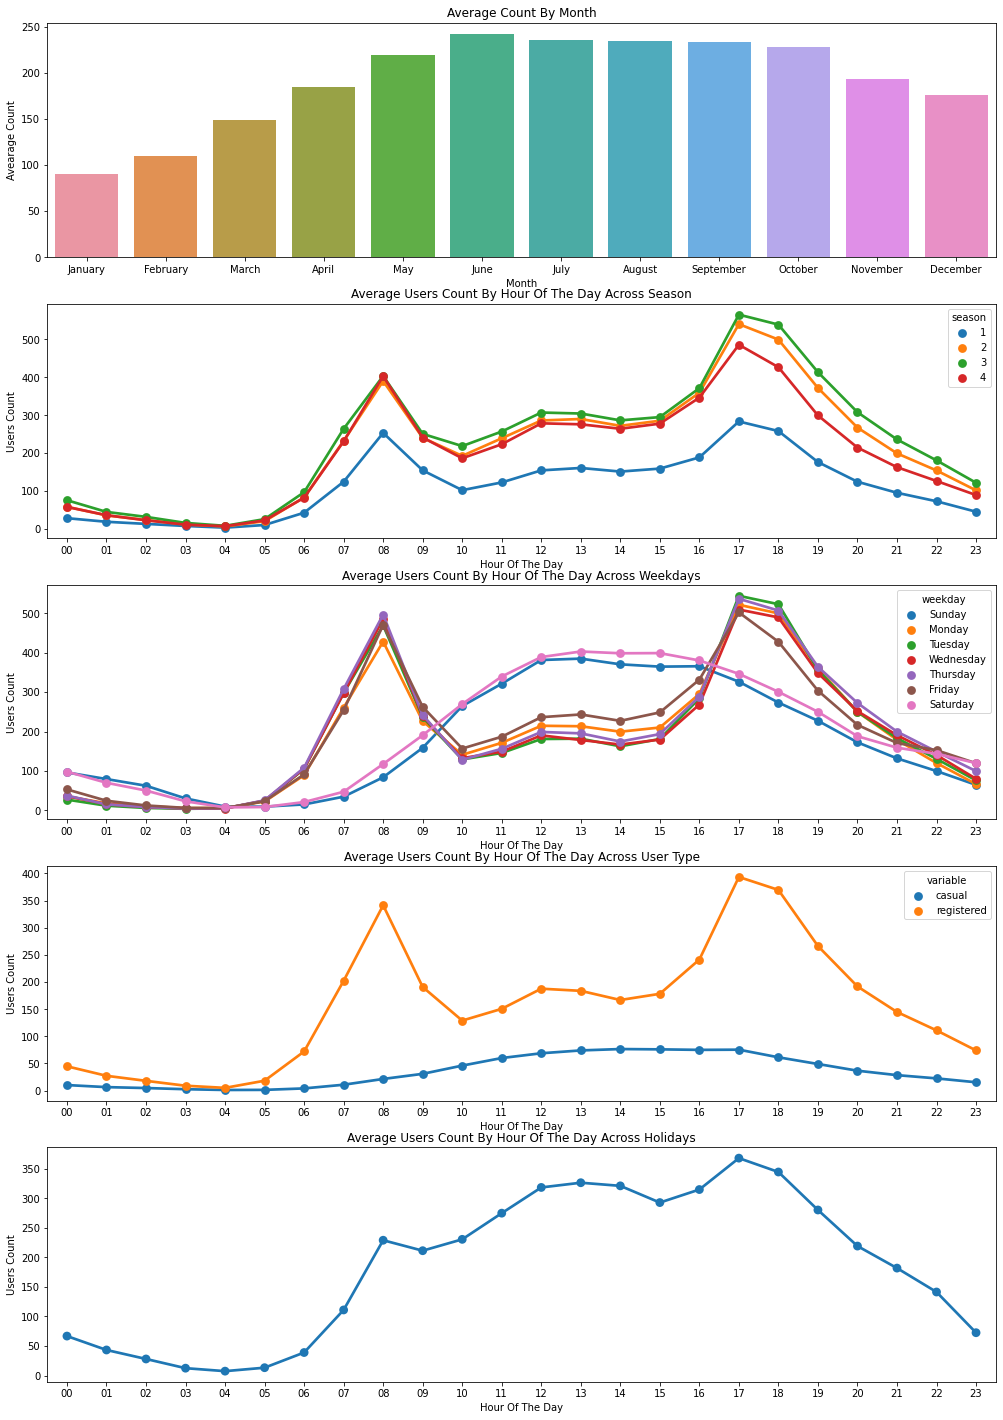

In [ ]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
pd.options.mode.chained_assignment = None

date_drop_train = train.copy()
date_drop_train
date_drop_train["date"] = date_drop_train.datetime.apply(lambda x : x.split()[0])
date_drop_train["hour"] = date_drop_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
date_drop_train["weekday"] = date_drop_train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
date_drop_train["month"] = date_drop_train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
date_drop_train  = date_drop_train.drop(["datetime"],axis=1)
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(17,25)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# 월 별 평균 대여량
monthAggregated = pd.DataFrame(date_drop_train.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
# 계절 별 평균 대여량 
hourAggregated = pd.DataFrame(date_drop_train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')
# 요일 별 평균 대여량 
# 주말과 평일의 대여량이 차이를 보임
# 주말에는 낮에 대여량이 많으며, 평일에는 출퇴근 시간에 대여량이 증가하는 모습이 뚜렷함 
hourAggregated = pd.DataFrame(date_drop_train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')
# 회원/비회원 평균 대여량
# 회원인 경우 평일 대여량과 비슷한 양상을 보임 - 출퇴근 시간에 집중 되어있음 
# 비회원 경우 완만한 모습을 보임
hourTransformed = pd.melt(date_drop_train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')
# 공휴일 시간별 평균 대여량
# 평일과는 달리 출퇴근 시간의 사이에도 대여량이 많음
weekday_drop_train = date_drop_train.copy()
holiday_idx = weekday_drop_train[weekday_drop_train['holiday'] == 0].index
weekday_drop_train = weekday_drop_train.drop(holiday_idx)
hourAggregated = pd.DataFrame(weekday_drop_train.groupby(["hour"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"], join=True,ax=ax5)
ax5.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Holidays",label='big')

### 날씨 별 대여량

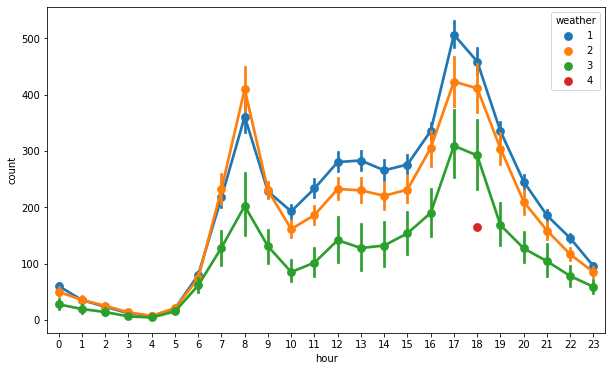

In [ ]:
# 1: 화창, 약간 구름낌
# 2: 안개+흐림, 안개+약간 구름낌, 안개
# 3: 소나기 + 천둥번개 + 구름, 소나기 + 구름, 싸락눈
# 4: 폭우 + 약한 우박 + 천둥번개 + 안개, 눈+안개
# 대체적으로 1 > 2 > 3 > 4 순으로 자전거 대여량이 많으며
# 날씨가 화창할수록 이용객이 많고 4의 경우에는 대여 횟수가 거의 없었음
train = pd.read_csv(DATA_PATH + "train.csv", parse_dates=["datetime"])
train1["hour"] = train["datetime"].dt.hour

fig,ax1= plt.subplots()
fig.set_size_inches(10,6)
sns.pointplot(data= train1, x='hour', y='count', hue='weather',ax=ax1)

### 온도, 습도, 풍속에 따른 대여량

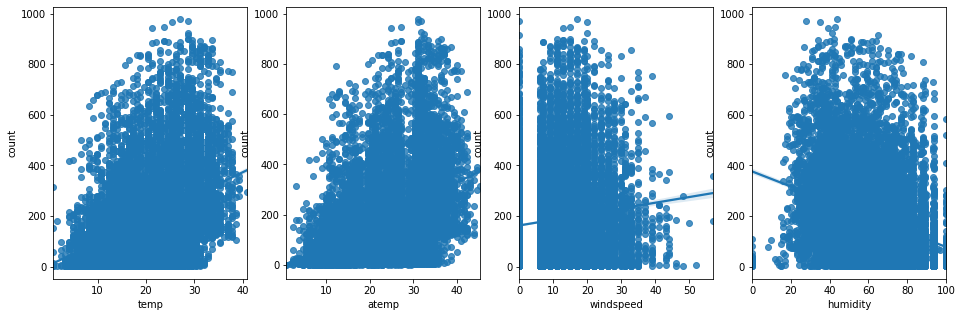

In [ ]:
# 온도, 습도, 풍속에 따른 대여량
fig,(ax1,ax2,ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(16,5)
# 온도 (temp) - 온도가 너무 높거나 낮을 경우에 대여량이 감소 
sns.regplot(x="temp",y="count",data=train,ax=ax1)
# 체감 온도 (atemp) - 체감 온도가 너무 높거나 낮을 경우에 대여량이 감소 
sns.regplot(x="atemp",y="count",data=train,ax=ax2)
# 풍속 (windspeed) - 풍속이 느릴 경우 대여량이 많음
sns.regplot(x="windspeed",y="count", data=train, ax=ax3)
# 습도 (humidity) - 대여량과 큰 관계를 갖지 않음 
sns.regplot(x="humidity", y="count", data=train, ax=ax4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

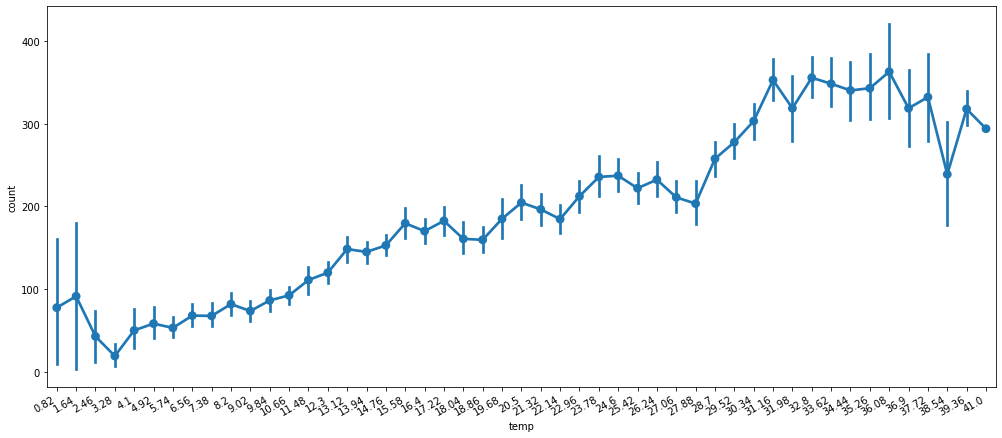

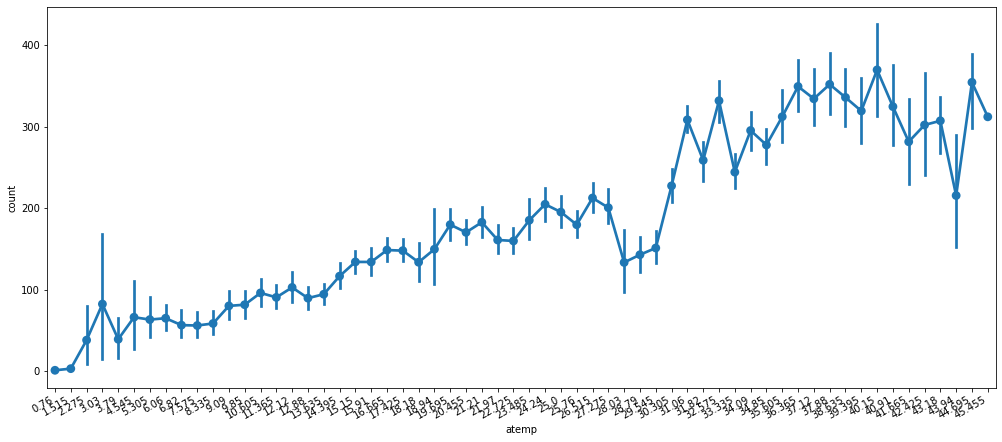

In [ ]:
#temp별 대여량
fig, ax1 = plt.subplots()
fig.set_size_inches(17,7)
sns.pointplot(data=train, x='temp', y='count')
plt.xticks(rotation=30, ha='right')

#atemp별 대여량
fig, ax1 = plt.subplots()
fig.set_size_inches(17,7)
sns.pointplot(data=train, x='atemp', y='count')
plt.xticks(rotation=30, ha='right')

### 데이터 간 상관관계

Text(0.5, 1.0, 'correlation')

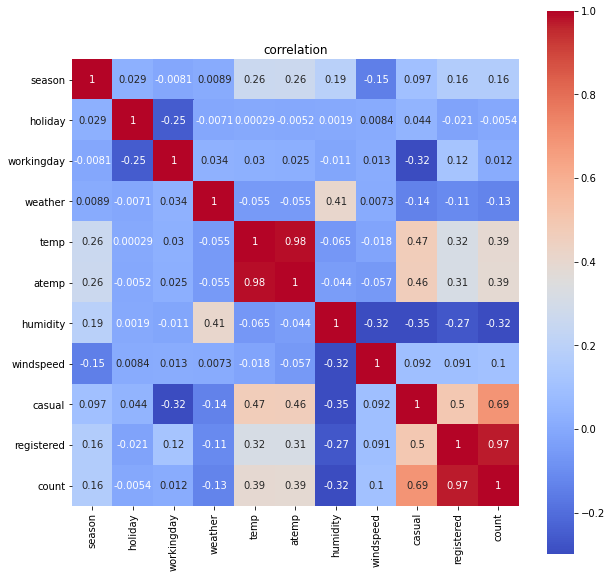

In [ ]:
# 데이터별 상관관계
# workingday - casual
# humidity - casual, registered 
cr = train[['datetime', 'season', 'holiday', 'workingday',
            'weather', 'temp', 'atemp', 'humidity', 
            'windspeed', 'casual', 'registered', 'count']]

cr = cr.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cr,vmin= -0.3, vmax=+1, square=True, annot=True, cmap='coolwarm')
plt.title('correlation')

### 근무일 여부에 따른 비회원 대여량

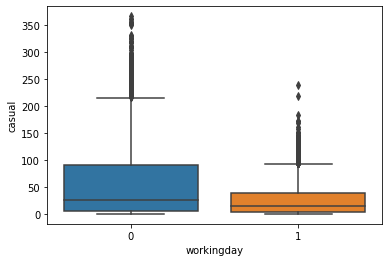

In [ ]:
# workingday
# 평일: holiday = 0 / workingday = 1, 공휴일: holiday = 1 / workingday = 0 / 주말: holiday = 0 , workingday = 0
# 근무일에 비회원 대여량이 적고, 휴일에 대여량이 많음
fig.set_size_inches(12,10)
sns.boxplot(data=train,y="casual",x="workingday",orient="v")

### 습도별 회원/비회원 대여량

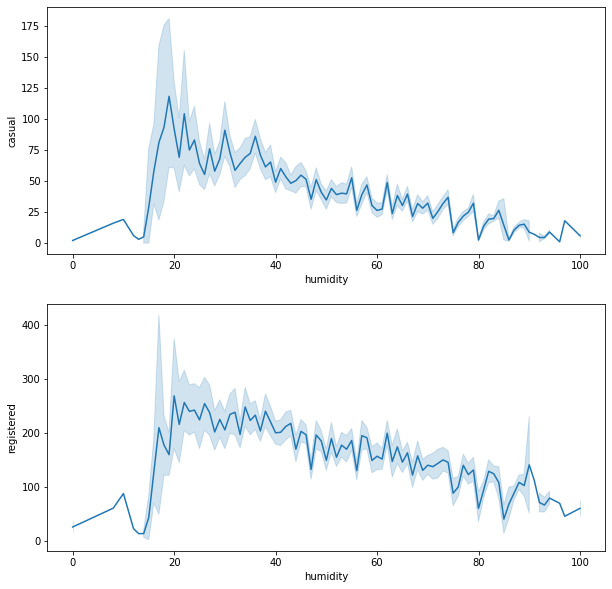

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(10,10)
# 습도가 낮을수록 비회원의 대여량이 많음
# 습도가 높아지면 비회원의 대여량이 눈에 띄게 줄어듬
sns.lineplot(data=train, x='humidity',y='casual',ax=ax1)
# 습도가 낮을수록 회원의 대여량이 많음
sns.lineplot(data=train, x='humidity',y='registered',ax=ax2)

# 데이터 전처리

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
del train['temp']
del train['atemp']
del train['humidity']
del train['windspeed']

In [ ]:
train

,datetime,season,holiday,workingday,weather,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,12,117,129


In [ ]:
pd.to_datetime(train['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['hour'] = pd.DatetimeIndex(train['datetime']).hour

In [ ]:
del train['datetime']

In [ ]:
train

,season,holiday,workingday,weather,casual,registered,count,year,month,hour
0,1,0,0,1,3,13,16,2011,1,0
1,1,0,0,1,8,32,40,2011,1,1
2,1,0,0,1,5,27,32,2011,1,2
3,1,0,0,1,3,10,13,2011,1,3
4,1,0,0,1,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,7,329,336,2012,12,19
10882,4,0,1,1,10,231,241,2012,12,20
10883,4,0,1,1,4,164,168,2012,12,21
10884,4,0,1,1,12,117,129,2012,12,22


# 모델 선택

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
RANDOM_SEED = 42
TEST_SPLIT = 0.2

# x = train_detail[['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature']]
# y = train_detail[['Weekly_Sales']]
x = train_detail.drop(['Weekly_Sales'],axis=1)
y = train_detail['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [ ]:
# train과 test로 데이터 나누기
# x = train['season', 'weather', 'workingday', 
#           'holiday', 'year', 'month', 'hour']
# y = test['count']
x = train[['season', 'weather', 'workingday', 'holiday', 'year', 'month', 'hour']]
y = train['count']
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=TEST_SPLIT,random_state = RANDOM_SEED)

In [ ]:
model = []

# RandomForestRegressor 모델
model.append(('RandomForestRegressor', RandomForestRegressor()))
# LinearRegression 모델
model.append(('LinearRegression', LinearRegression()))
# Ridge 모델
model.append(('Ridge', Ridge()))
# Lasso 모델
model.append(('Lasso', Lasso()))

In [ ]:
result = {}

for name, m in model:
    m.fit(x_train, y_train)
    result[name] = (m.score(x_train, y_train), m.score(x_test, y_test))
    print("{}\ttrain_score : {} \ttest_score: {}".format(name, result[name][0], result[name][1]))

RandomForestRegressor	train_score : 0.9569850718686954 	test_score: 0.9128908706765688
LinearRegression	train_score : 0.2733235226115448 	test_score: 0.27001823117037516
Ridge	train_score : 0.27332350471007505 	test_score: 0.2700195261953935
Lasso	train_score : 0.2728410991487653 	test_score: 0.2700039743813223


# 추론 과정

In [ ]:
idx = pd.Index(["Train Accuracy", "Test Accuracy"])
result_df = pd.DataFrame(result, index=idx)
result_df

,RandomForestRegressor,LinearRegression,Ridge,Lasso
Train Accuracy,0.956985,0.273324,0.273324,0.272841
Test Accuracy,0.912891,0.270018,0.270020,0.270004


In [ ]:
pd.to_datetime(test['datetime'])

0      2011-01-20 00:00:00
1      2011-01-20 01:00:00
2      2011-01-20 02:00:00
3      2011-01-20 03:00:00
4      2011-01-20 04:00:00
               ...        
6488   2012-12-31 19:00:00
6489   2012-12-31 20:00:00
6490   2012-12-31 21:00:00
6491   2012-12-31 22:00:00
6492   2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: datetime64[ns]

In [ ]:
test

,season,holiday,workingday,weather,year,month,hour
0,1,0,1,1,2011,1,0
1,1,0,1,1,2011,1,1
2,1,0,1,1,2011,1,2
3,1,0,1,1,2011,1,3
4,1,0,1,1,2011,1,4
...,...,...,...,...,...,...,...
6488,1,0,1,2,2012,12,19
6489,1,0,1,2,2012,12,20
6490,1,0,1,1,2012,12,21
6491,1,0,1,1,2012,12,22


In [ ]:
train

,season,holiday,workingday,weather,count,year,month,hour
0,1,0,0,1,16,2011,1,0
1,1,0,0,1,40,2011,1,1
2,1,0,0,1,32,2011,1,2
3,1,0,0,1,13,2011,1,3
4,1,0,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...
10881,4,0,1,1,336,2012,12,19
10882,4,0,1,1,241,2012,12,20
10883,4,0,1,1,168,2012,12,21
10884,4,0,1,1,129,2012,12,22


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
test_input = test
test_predict = model[0][1].predict(test_input)
test_predict

array([  8.89987734,   2.94330408,   1.79752056, ..., 204.49003924,
       151.9398841 ,  86.50533503])

In [ ]:
test_input['count'] = test_predict
test_input

,season,holiday,workingday,weather,year,month,hour,count
0,1,0,1,1,2011,1,0,8.899877
1,1,0,1,1,2011,1,1,2.943304
2,1,0,1,1,2011,1,2,1.797521
3,1,0,1,1,2011,1,3,2.245606
4,1,0,1,1,2011,1,4,2.554561
...,...,...,...,...,...,...,...,...
6488,1,0,1,2,2012,12,19,390.768897
6489,1,0,1,2,2012,12,20,250.790824
6490,1,0,1,1,2012,12,21,204.490039
6491,1,0,1,1,2012,12,22,151.939884


In [ ]:
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')

In [ ]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:
submission["count"] = test_predict
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,8.899877
1,2011-01-20 01:00:00,2.943304
2,2011-01-20 02:00:00,1.797521
3,2011-01-20 03:00:00,2.245606
4,2011-01-20 04:00:00,2.554561
